In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.shape


(891, 12)

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1).corr()['Survived']
# df.corr()

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Univariate analysis
### analysis of independent cols

<Axes: xlabel='Survived'>

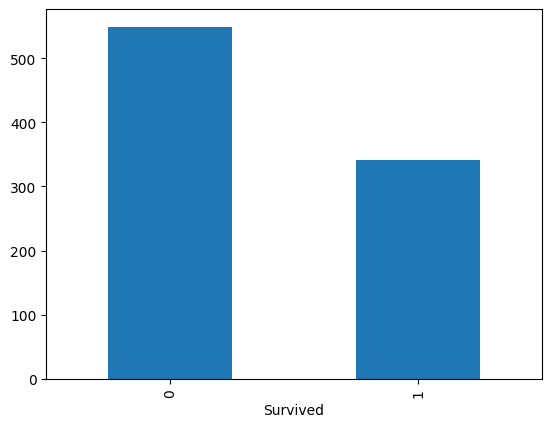

In [10]:
import seaborn as sns
df['Survived'].value_counts().plot(kind='bar')

# Numerical value analysis

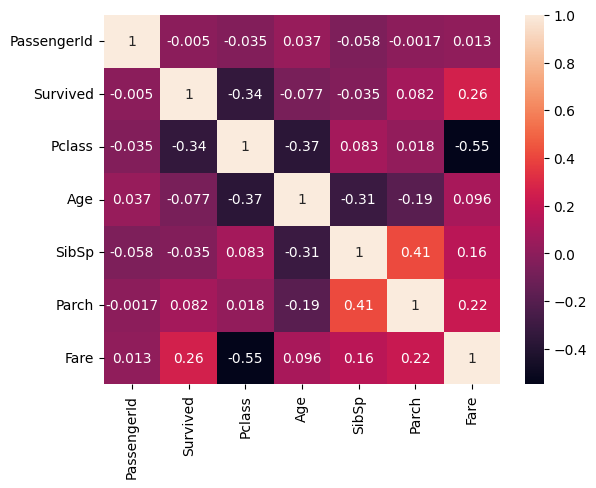

In [11]:
heatmap = sns.heatmap(df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1).corr(), annot=True)

In [12]:
#SibSb

df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

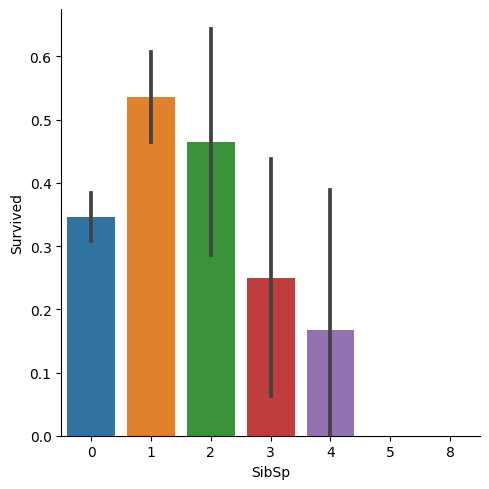

In [20]:
bar_sipsp = sns.catplot(x="SibSp",y="Survived", data = df, kind='bar') #catplot is used for categorical values

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


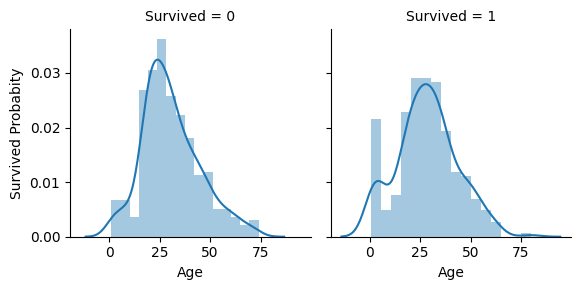

In [23]:
# Age

age_vis = sns.FacetGrid(col="Survived",data = df) #visualizing distribution of one variable
age_vis = age_vis.map(sns.distplot,"Age")
age_vis = age_vis.set_ylabels("Survived Probabity")

<Axes: xlabel='Sex', ylabel='Survived'>

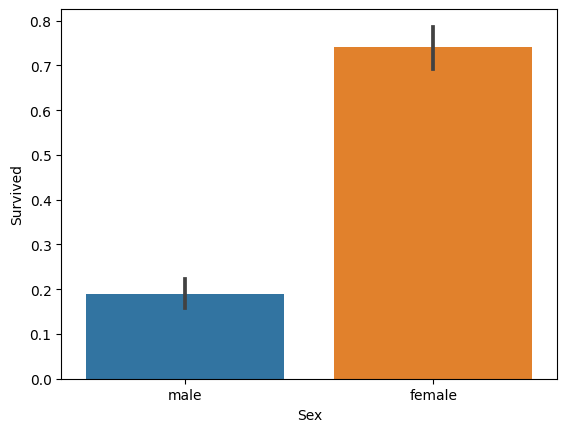

In [24]:
#Gender

sns.barplot(data=df, x="Sex",y="Survived")

In [30]:
df[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


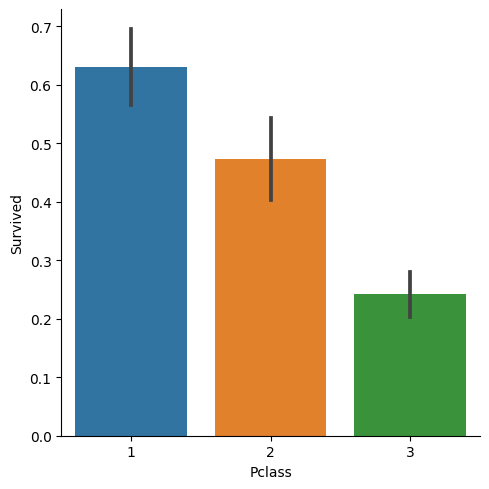

In [34]:
# PClass

sns.catplot(data=df,x="Pclass",y="Survived",kind="bar")

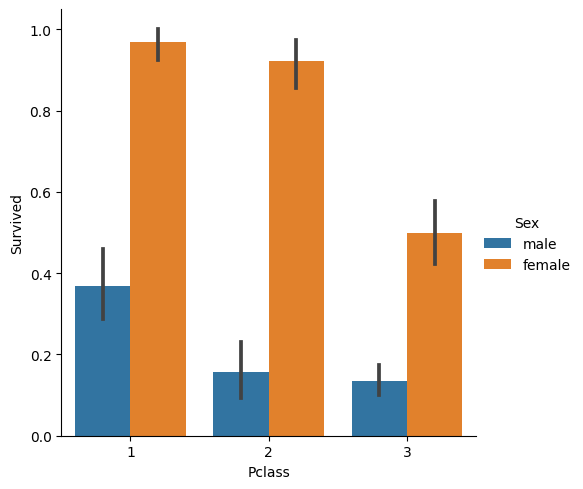

In [35]:
# Pcalss and gender

sns.catplot(data=df,x="Pclass",y="Survived",hue="Sex",kind="bar")

In [36]:
#Embarked

df["Embarked"].isnull().sum()


2

In [37]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [38]:
df["Embarked"] = df["Embarked"].fillna('S')

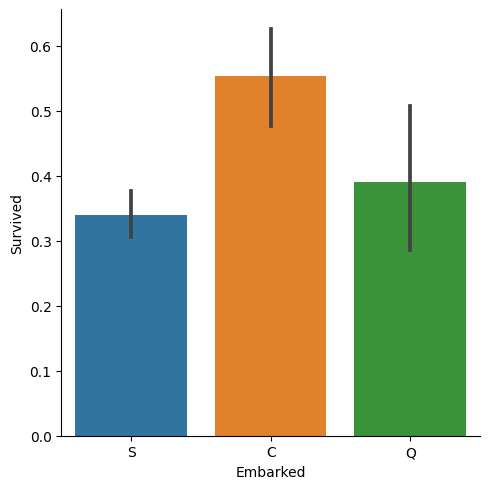

In [41]:
sns.catplot(data=df,x="Embarked",y="Survived",kind="bar")

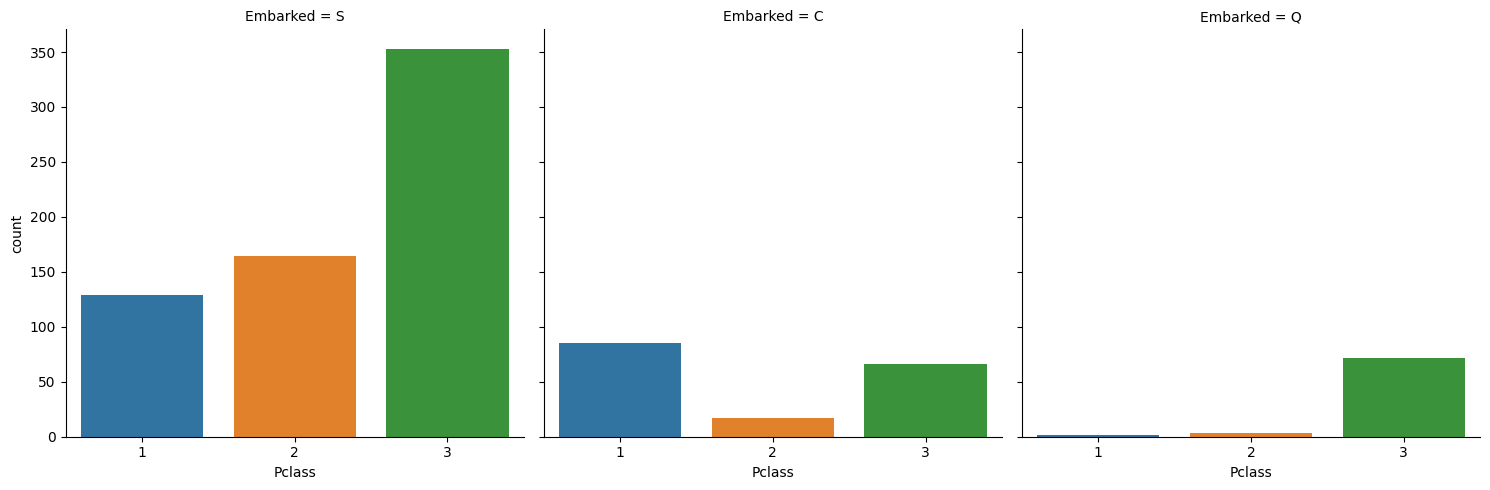

In [45]:
# passenger c have higher rate of survival

sns.catplot(x="Pclass",col="Embarked",data=df,kind="count")

In [46]:
# mostly the passengers were from class 1 from embarked from C so they had higher rate of surival

In [48]:
# Removing the null values and preparing data

mean = df["Age"].mean()
std = df['Age'].std()

In [50]:
rand_age = np.random.randint(mean-std,mean+std,size=177)

In [51]:
age_index = df["Age"].copy()
age_index[np.isnan(age_index)] = rand_age

df["Age"] = age_index

In [52]:
df["Age"].isnull().sum()

0

In [53]:
df["Embarked"] = df["Embarked"].fillna('S')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [57]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,42.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [59]:
genders = {"male":0,"female":1}

df["Sex"] = df["Sex"].map(genders)

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [62]:
ports = {'S':0,'C':1,'Q':2}

df["Embarked"]=df["Embarked"].map(ports)